<a href="https://colab.research.google.com/github/pedrolira10/mvpMachine/blob/main/Mvp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP – DETECÇÃO DE FRAUDES**

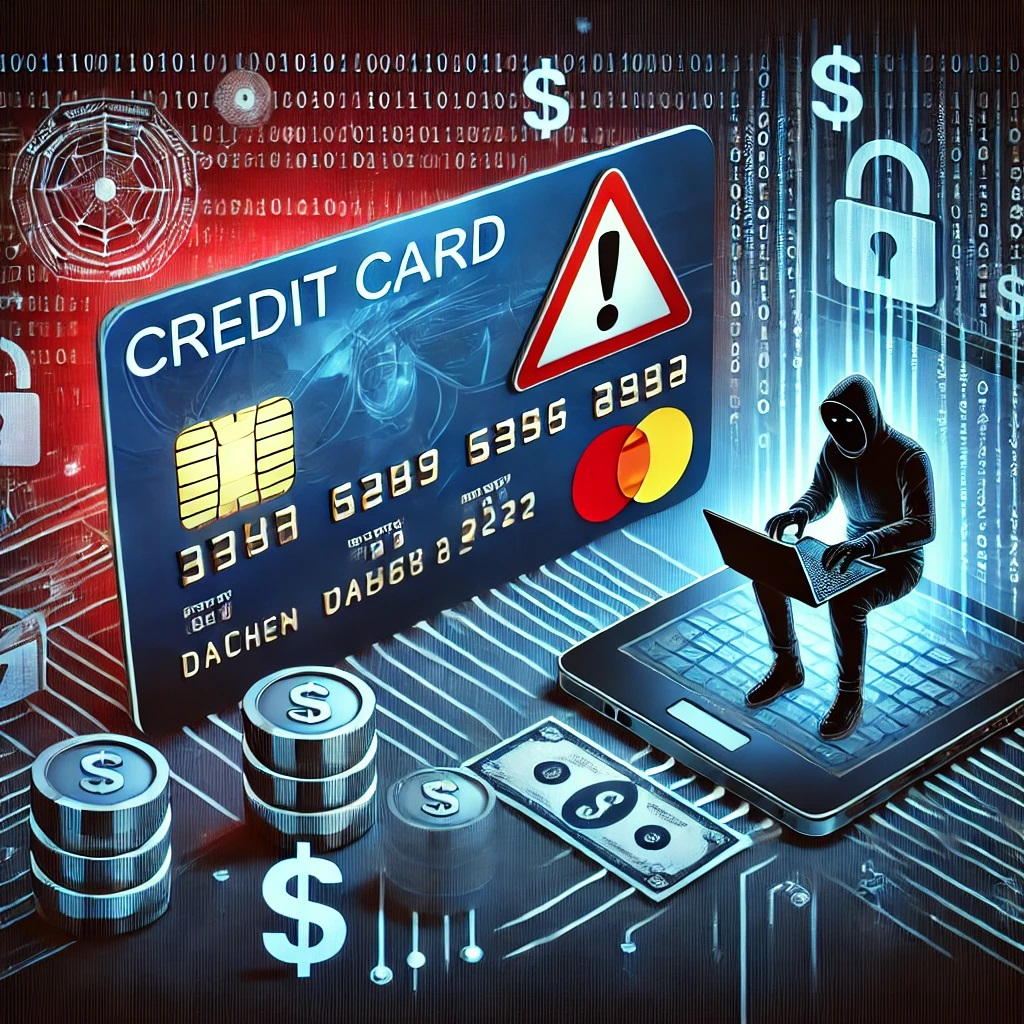

#Introdução

##Descrição do Problema

A fraude em cartões de crédito representa um desafio crescente na era digital, comprometendo a segurança das transações financeiras e minando a confiança dos consumidores no comércio eletrônico. Com o uso de cartões de crédito cada vez mais integrado às compras cotidianas, surgem inúmeras oportunidades para fraudadores, que empregam técnicas sofisticadas para explorar vulnerabilidades nos sistemas de pagamento. Essa ameaça acarreta prejuízos significativos para usuários e instituições financeiras, incluindo cobranças indevidas, perda de credibilidade e elevados custos operacionais.

##Objetivo
Diante desse cenário, torna-se indispensável a implementação de soluções robustas e avançadas, apoiadas por inteligência artificial e análise de dados, com capacidade preditiva na distinção de operações normais ou fraudulentas. Visando mitigar os riscos associados à fraude, protegendo consumidores e instituições financeiras.

##Tipo de Problema
Trata-se de um problema de classificação supervisionada, no qual o modelo é desenvolvido com base em um conjunto de dados de entrada. A variável a ser predita é categórica, representando uma transação legítima ou fraudulenta, exigindo que o modelo identifique padrões nos dados para realizar essa classificação de forma precisa e eficiente.

##Premissas e Hipóteses

*   Premissas: A segurança das transações financeiras é fundamental para preservar a confiança dos consumidores. No entanto, o aumento do uso de cartões de crédito e a sofisticação das técnicas empregadas por fraudadores criam vulnerabilidades significativas, que só podem ser mitigadas por meio de soluções avançadas capazes de identificar e prevenir atividades fraudulentas de forma eficaz.



*   Hipóteses: Padrões comportamentais e anomalias nas transações financeiras podem ser identificados e analisados por modelos de machine learning, permitindo a detecção eficaz de fraudes com alta precisão e baixo índice de falsos positivos.



##Restrições e Condições



*   Restrições: A base de dados utilizada neste projeto foi obtida exclusivamente de um conjunto disponibilizado na plataforma Kaggle. A seleção foi realizada considerando as entradas já presentes no dataset, garantindo que os dados fossem apropriados para os objetivos da análise e do treinamento do modelo, respeitando as limitações e a estrutura fornecida pelo conjunto escolhido.



*  Condições: As condições para a seleção dos dados foram guiadas pela necessidade de escolher um conjunto que representasse, de maneira fiel e detalhada, informações relevantes sobre transações financeiras realizadas com cartões de crédito. Um aspecto crítico na construção de um modelo eficiente foi a análise do balanceamento dos dados, dado que, em problemas como a detecção de fraudes, as transações fraudulentas geralmente correspondem a uma minoria significativa em relação ao volume total de operações.



##Descrição do Dataset

O conjunto de dados utilizado neste projeto contém informações sobre transações financeiras realizadas com cartão de crédito por portadores europeus, registradas em setembro de 2013. Este dataset real e confidencial foi cuidadosamente preparado, com as variáveis de entrada apresentadas predominantemente em formato numérico, resultantes de uma transformação por Análise de Componentes Principais (PCA).
As variáveis denominadas V1, V2, ..., V28 correspondem aos componentes obtidos por PCA, sendo transformações que preservam os padrões subjacentes, mas garantem a privacidade dos dados originais. Apenas as variáveis “Time” e “Amount” mantêm os valores reais.

*   Time: Representa os segundos transcorridos entre cada transação e a primeira transação registrada no conjunto.
*   Amount: Refere-se ao valor monetário de cada operação.

A variável “Class” é o alvo (target) do modelo, indicando se a transação foi fraudulenta (1) ou legítima (0).


#Importar as bibliotecas

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#Carga do Dataset

O dataset utilizado neste projeto foi coletado através de um conjunto disponível na plataforma do Kaggle, proveniente de transações reais com cartões de credito no período de setembro de 2013.

Link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Nesta etapa, foi carregado o conjunto e exibido as primeiras linhas do mesmo para uma visualização inicial das informações contidas.


In [ ]:
url = "https://raw.githubusercontent.com/pedrolira10/mvpMachine/refs/heads/main/creditcard-1.csv"

df= pd.read_csv(url, delimiter=',')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Feita a verificação, foi possível analisar que o conjunto não possui valores nulos.


In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Analise do número de registros e tipo dos dados, apenas valores numéricos estão presentes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42494 entries, 0 to 42493
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    42494 non-null  int64  
 1   V1      42494 non-null  float64
 2   V2      42494 non-null  float64
 3   V3      42494 non-null  float64
 4   V4      42494 non-null  float64
 5   V5      42494 non-null  float64
 6   V6      42494 non-null  float64
 7   V7      42494 non-null  float64
 8   V8      42494 non-null  float64
 9   V9      42494 non-null  float64
 10  V10     42494 non-null  float64
 11  V11     42494 non-null  float64
 12  V12     42494 non-null  float64
 13  V13     42494 non-null  float64
 14  V14     42494 non-null  float64
 15  V15     42494 non-null  float64
 16  V16     42494 non-null  float64
 17  V17     42494 non-null  float64
 18  V18     42494 non-null  float64
 19  V19     42494 non-null  float64
 20  V20     42494 non-null  float64
 21  V21     42494 non-null  float64
 22

Analise estatística do modelo sobre a distribuição dos dados, como a média, desvio padrão, valor mínimo, limite superior dos quartis e valor máximo. A variável “Amout” possui um valor médio de 89.50 e um desvio padrão de 237,87. O valor máximo apresentado foi de 7879,42, explicando o desvio padrão tendo em vista que maior parte das transações possuem valores menores.  

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,42494.000000,42494.000000,42494.000000,42494.000000,42494.000000,42494.000000,42494.000000,42494.000000,42494.000000,42494.000000,...,42494.000000,42494.000000,42494.000000,42494.000000,42494.000000,42494.000000,42494.000000,42494.000000,42494.000000,42494.000000
mean,26489.740787,-0.224414,0.032168,0.710909,0.188779,-0.236180,0.099798,-0.112054,0.045908,0.185287,...,-0.028483,-0.110380,-0.040082,0.008778,0.136343,0.023115,0.007697,0.005148,89.506463,0.002636
std,12760.025809,1.856103,1.602161,1.485466,1.399600,1.386749,1.308997,1.236234,1.204120,1.217829,...,0.741112,0.638230,0.569169,0.592664,0.436850,0.503997,0.388474,0.344141,237.879017,0.051272
min,0.000000,-56.407510,-72.715728,-31.103685,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,17818.500000,-0.976335,-0.534977,0.229395,-0.717249,-0.843677,-0.637662,-0.598407,-0.150430,-0.574165,...,-0.234497,-0.531799,-0.178959,-0.322849,-0.127520,-0.329485,-0.063253,-0.006832,7.500000,0.000000
50%,31555.000000,-0.241432,0.093466,0.809948,0.187025,-0.274498,-0.155779,-0.073459,0.051745,0.063127,...,-0.073892,-0.084848,-0.051219,0.061755,0.175768,-0.065456,0.008562,0.021658,24.345000,0.000000
75%,36545.000000,1.159076,0.739723,1.440675,1.069459,0.291441,0.485785,0.431340,0.319899,0.894883,...,0.103309,0.302076,0.077278,0.400848,0.421184,0.303967,0.084861,0.076224,80.140000,0.000000
max,41125.000000,1.960497,16.713389,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,7879.420000,1.000000


Exibição de um gráfico comparativo relacionado à variável alvo "Class", evidenciando a desproporção entre as categorias de transações: normais (representadas pelo valor 0) e fraudulentas (representadas pelo valor 1). Essa visualização destaca o desequilíbrio na distribuição dos dados, com um número significativamente maior de transações normais em comparação com fraudes.

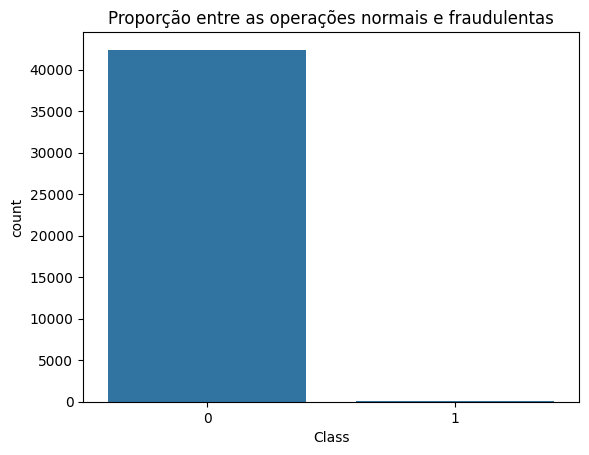

In [ ]:
sns.countplot(x='Class', data=df)
plt.title('Proporção entre as operações normais e fraudulentas')
plt.show()

#Preparação dos Dados

Os dados foram separados em conjuntos de treino e teste para possibilitar a validação cruzada. A estratificação foi utilizada para garantir que a distribuição da variável alvo (target) fosse preservada em ambos os conjuntos, resultando em grupos mais homogêneos e representativos, especialmente em cenários de classes desbalanceadas.
Em seguida, foram definidos os parâmetros e as partições para a validação cruzada, optando por uma divisão em 10 folds (partições) para melhorar a robustez dos modelos.
A métrica escolhida para avaliação foi o Recall, devido à sua relevância em problemas de classificação, particularmente em detecção de fraudes. O Recall mede a capacidade do modelo de identificar corretamente as classes positivas reais, calculando a proporção entre os verdadeiros positivos previstos e o total de casos positivos existentes. Essa métrica é essencial para avaliar o desempenho do modelo na detecção de eventos críticos, como transações fraudulentas.


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=7,stratify=y)

scoring = {'recall': 'recall'}
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=7)

#Modelagem e Treinamento


##Escolha dos Algoritmos


Ambos os modelos escolhidos apresentam bom desempenho em problemas de classificação como este. No entanto, optei por selecionar múltiplos algoritmos para comparar sua eficiência. A regressão logística é um método simples, intuitivo e fácil de implementar, destacando-se em grandes conjuntos de dados. Contudo, pode ser limitada na captura de padrões mais complexos, especialmente em situações não lineares.
Por outro lado, o modelo de Decision Tree possui a vantagem de identificar padrões complexos de forma eficaz e requer pouca preparação dos dados. No entanto, tem a tendência de se ajustar excessivamente aos dados de treinamento, levando ao problema de overfitting.
Finalmente, escolhi incluir também o Random Forest, que se destaca por seu alto desempenho na detecção de padrões não lineares e complexos. Esse modelo é especialmente útil em cenários com dados desbalanceados e apresenta menor suscetibilidade ao overfitting.


## 1.1 Comentários

Nesta etapa o desenvolvimento do código foi realizado para obter um desempenho de diferentes modelos de classificação utilizando a validação cruzada.
Models é um dicionário onde cada chave é o nome de um modelo de machine learning e o valor é a instância do modelo correspondente. Foi usado o Random State para garantir a reprodutibilidade, o parâmetro Max iter especifica o número máximo de interações.
Foi criado listas par armazenamento, onde results armazena as métricas de desempenho (recall) de cada modelo e names armazena os nomes dos modelos avaliados, para uso posterior.
Feito um loop para avaliação dos modelos, e realizada a validação cruzada. Foi usado como métrica de avaliação o Recall que permite avaliar o desempenho de um modelo de classificação, comparando as previsões do modelo com os valores reais.
Os resultados são armazenados na lista results e nome do modelo é adicionado na lista names. Os dados obtidos são exibidos. Com base no treinamento do modelo não foi identificado problemas com undefitting, existem outros métodos mais avançados a serem empregados neste tipo de problema porem devem avaliados criteriosamente.



Modelo: Logistic Regression
Recall médio: 0.6214
Desvio padrão do Recall: 0.2219
----------------------------------------
Modelo: Decision Tree
Recall médio: 0.7964
Desvio padrão do Recall: 0.1409
----------------------------------------
Modelo: Random Forest
Recall médio: 0.7982
Desvio padrão do Recall: 0.1265
----------------------------------------


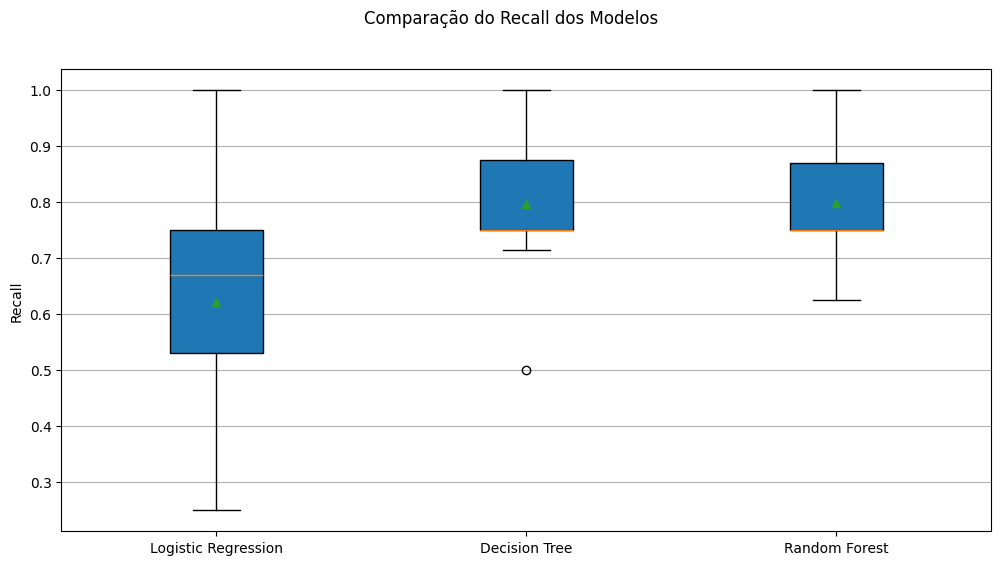

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=7, max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=7),
    "Random Forest": RandomForestClassifier(random_state=7)
}

results = []
names = []

for model_name, model in models.items():
    print(f"Modelo: {model_name}")

    cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)

    results.append(cv_results['test_recall'])
    names.append(model_name)

    print(f"Recall médio: {cv_results['test_recall'].mean():.4f}")
    print(f"Desvio padrão do Recall: {cv_results['test_recall'].std():.4f}")
    print("-" * 40)

fig = plt.figure(figsize=(12, 6))
fig.suptitle('Comparação do Recall dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results, vert=True, patch_artist=True, showmeans=True)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.grid(True, axis='y')
plt.show()

## 1.1 Resultados

*   Modelo: Logistic Regression

O recall médio é o mais baixo entre os três modelos, indicando uma menor previsão correta dos dados fraude.

O desvio padrão é o mais alto (0.2219), o que significa que o desempenho do modelo varia significativamente entre os folds. Isso pode indicar instabilidade ou que o modelo não está generalizando bem nos diferentes conjuntos de validação.

*   Modelo: Decision Tree

O recall médio é significativamente melhor do que o da Logistic Regression, mostrando que o modelo é mais eficaz em identificar a quatidade de operações fraudulentas.

O desvio padrão é menor (0.1409), indicando maior consistência nos resultados entre os folds. No entanto, ainda há alguma variação.

*   Modelo: Random Forest

O recall médio é o maior entre os três modelos, superando ligeiramente o da Decision Tree.

O desvio padrão é o menor (0.1265), indicando o melhor equilíbrio e consistência nos resultados entre os folds.

*   Conclusão:

O Random Forest é o modelo mais eficaz e confiável entre os três, com o melhor recall médio e menor variabilidade. É ideal para problemas onde maximizar o recall é crucial.

## 1.2 Comentários

O conjunto de dados analisado apresentava um desbalanceamento significativo entre as classes, favorecendo a classe majoritária. Para corrigir esse problema, utilizei o método de undersampling, que consiste em reduzir aleatoriamente o número de amostras da classe majoritária. Essa técnica tem como objetivo equilibrar a distribuição entre as classes, permitindo que o modelo aprenda de forma mais equitativa sobre ambas, minimizando a influência desproporcional da classe dominante.

In [ ]:
under = RandomUnderSampler(random_state=7)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)

print(pd.Series(y_train_under).value_counts())

Class
0    78
1    78
Name: count, dtype: int64


Modelo: Logistic Regression
Recall médio: 0.9250
Desvio padrão do Recall: 0.0829
----------------------------------------
Modelo: Decision Tree
Recall médio: 0.8875
Desvio padrão do Recall: 0.1179
----------------------------------------
Modelo: Random Forest
Recall médio: 0.9250
Desvio padrão do Recall: 0.1000
----------------------------------------


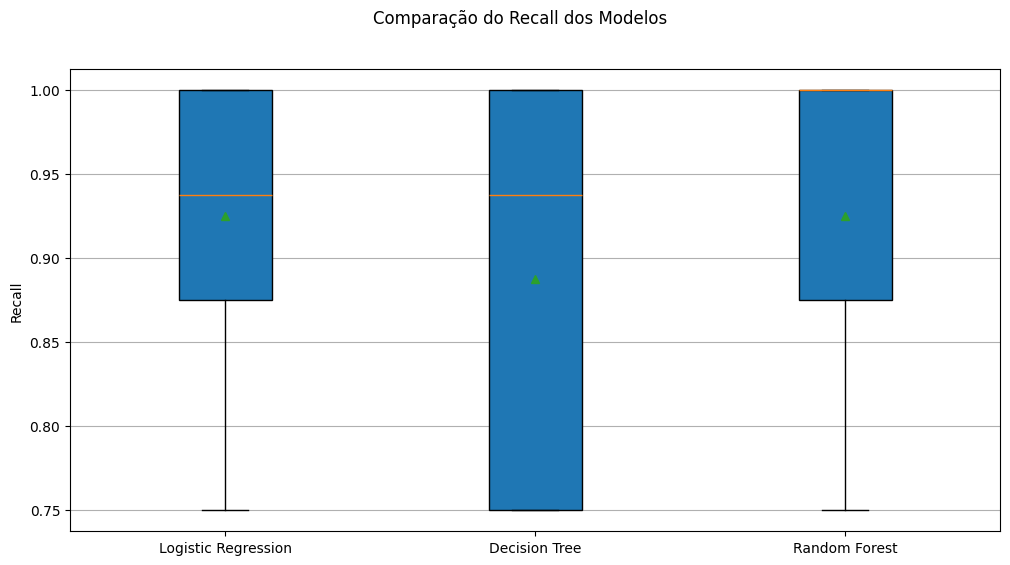

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=7, max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=7),
    "Random Forest": RandomForestClassifier(random_state=7)
}

results = []
names = []

for model_name, model in models.items():
    print(f"Modelo: {model_name}")

    cv_results = cross_validate(model, X_train_under, y_train_under, cv=kfold, scoring=scoring)

    results.append(cv_results['test_recall'])
    names.append(model_name)

    print(f"Recall médio: {cv_results['test_recall'].mean():.4f}")
    print(f"Desvio padrão do Recall: {cv_results['test_recall'].std():.4f}")
    print("-" * 40)

fig = plt.figure(figsize=(12, 6))
fig.suptitle('Comparação do Recall dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results, vert=True, patch_artist=True, showmeans=True)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.grid(True, axis='y')
plt.show()

## 1.2 Resultados

*   Modelo: Logistic Regression

O recall médio apresentado empata com o Random Forest, indicando que o modelo tem uma alta capacidade de identificar corretamente os casos.

O desvio padrão de (0.0829) é o menor entre os modelos avaliados, o que reflete maior estabilidade e consistência nos resultados ao longo dos folds da validação cruzada.


*   Modelo: Decision Tree

O recall médio também apresentou um bom desempenho, embora inferior aos outros dois modelos. Ainda assim, sua capacidade de identificar a classe positiva é adequada para muitos cenários.

O desvio padrão de (0.1179) é maior que o da Logistic Regression, indicando uma menor estabilidade.


*  Modelo: Random Forest

O Recall Médio assim como a Logistic Regression, o Random Forest apresentou um recall médio excelente, sendo capaz de identificar a maioria das operações normais e identificou todas as fraudes.
  
O desvio padrão de (0.1000) indicando que o modelo é ligeiramente menos consistente em seus resultados ao longo dos folds. No entanto, essa diferença é pequena.


*   Conclusão:

Logistic Regression e Random Forest são os modelos mais eficazes para este problema, dado o recall médio elevado e a estabilidade.

## 1.3 Comentários

O conjunto de dados analisado apresentava um desbalanceamento significativo entre as classes. Para corrigir esse problema, utileizei o método Oversampling que consiste em aumentar a quantidade de registros da classe com menor frequência (fraude) até que a base de dados possua uma quantidade equilibrada entre as classes da variável alvo (target).

In [ ]:
over = RandomOverSampler(random_state=7)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)

Modelo: Logistic Regression
Recall médio: 0.9773
Desvio padrão do Recall: 0.0047
----------------------------------------
Modelo: Decision Tree
Recall médio: 1.0000
Desvio padrão do Recall: 0.0000
----------------------------------------
Modelo: Random Forest
Recall médio: 1.0000
Desvio padrão do Recall: 0.0000
----------------------------------------


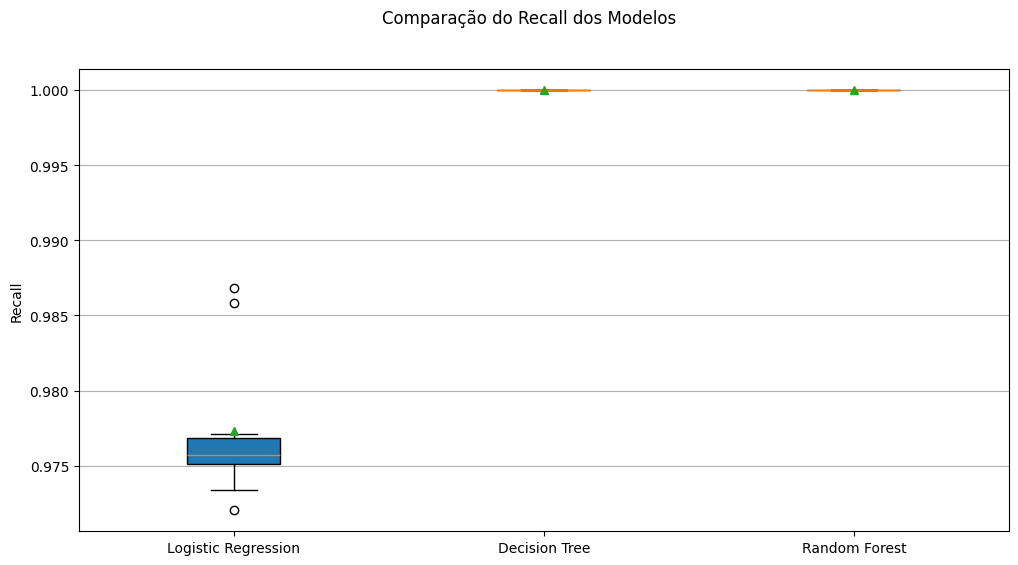

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=7, max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=7),
    "Random Forest": RandomForestClassifier(random_state=7)
}

results = []
names = []

for model_name, model in models.items():
    print(f"Modelo: {model_name}")

    cv_results = cross_validate(model, X_train_over, y_train_over, cv=kfold, scoring=scoring)

    results.append(cv_results['test_recall'])
    names.append(model_name)

    print(f"Recall médio: {cv_results['test_recall'].mean():.4f}")
    print(f"Desvio padrão do Recall: {cv_results['test_recall'].std():.4f}")
    print("-" * 40)

fig = plt.figure(figsize=(12, 6))
fig.suptitle('Comparação do Recall dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results, vert=True, patch_artist=True, showmeans=True)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.grid(True, axis='y')
plt.show()

## 1.3 Resultados

*  Modelo: Logistic Regression

O Recall médio apresentou uma qualidade desejável, mesmo que o recall não seja perfeito.

O Desvio padrão de (0.0047) é baixo, indicando que o modelo é estável e apresenta um desempenho semelhante em diferentes execuções.

*  Modelo: Decision Tree

O recall médio, no entanto, pode apresentar um reflexo de overfitting, especialmente considerando que árvores de decisão individuais tendem a ser muito ajustadas aos dados de treinamento.

Desvio padrão de (0.0000) é o valor mais baixo possível, mostrando que o modelo é consistente em todos os folds.


*   Modelo: Random Forest

Ao contrário da Decision Tree, o Random Forest é menos propenso a overfitting devido à combinação de múltiplas árvores, o que reforça que este recall perfeito pode ser mais confiável.

O Desvio padrão de (0.0000) também reflete uma estabilidade absoluta no desempenho.

*   Conclusão:

Decision Tree e Random Forest superam Logistic Regression no quesito recall, com resultados perfeitos e estáveis, entretanto o Random Forest é menos propenso a overfitting.


# Avaliação de Resultados

## Comentários Finais

Nesta etapa final, o modelo Random Forest é instanciado com uma semente aleatória para garantir a reprodutibilidade dos resultados. Em seguida, ele é treinado utilizando os dados previamente balanceados por meio do undersampling.
Após o treinamento, o modelo é utilizado para gerar previsões no conjunto de teste (X_test). Essas previsões são então comparadas com os rótulos reais (y_test) para avaliar seu desempenho.
Para essa avaliação, foram empregadas diversas métricas e funções analíticas, como:

*  classification_report: retorna métricas detalhadas, incluindo precision, recall, F1-score e suporte para cada classe. Essas informações são cruciais para entender como o modelo performa.

*   recall_score e precision_score: fornecem uma análise específica de aspectos como a proporção de positivos corretamente identificados e a precisão das predições positivas.

*   confusion_matrix: gera a matriz de confusão, que apresenta um resumo visual das predições do modelo, evidenciando a quantidade de acertos e erros em cada classe.





Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     12715
           1       0.12      1.00      0.21        34

    accuracy                           0.98     12749
   macro avg       0.56      0.99      0.60     12749
weighted avg       1.00      0.98      0.99     12749

Recall score 
 1.0
Precision score 
 0.11683848797250859


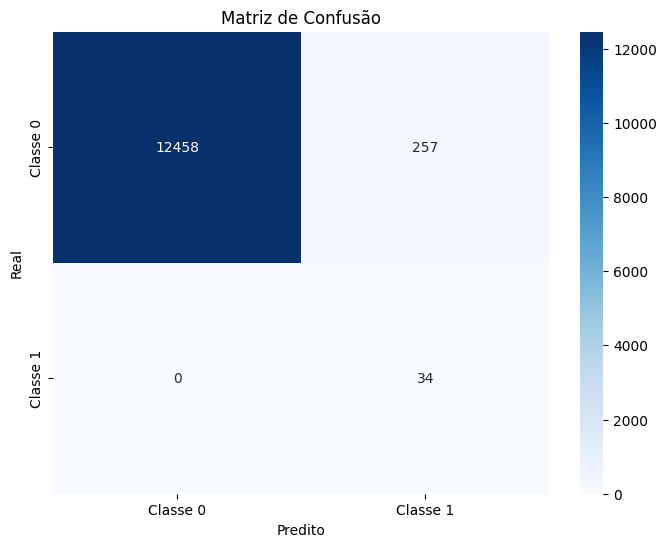

In [ ]:
rf = RandomForestClassifier(random_state=7)
rf = rf.fit(X_train_under, y_train_under)

rf_predict = rf.predict(X_test)

print('Classification metrics: \n', classification_report(y_test, rf_predict))
print('Recall score \n', recall_score(y_test, rf_predict))
print('Precision score \n', precision_score(y_test, rf_predict))

cm = confusion_matrix(y_test, rf_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Resultados Finais

Com base nos testes e comparativos realizados, o algoritmo que se destacou positivamente e demonstrou maior eficiência na previsão de fraudes foi o Random Forest. Este modelo se mostrou robusto em lidar com problemas complexos, apresentando um alto desempenho na detecção de padrões não lineares e uma menor suscetibilidade ao overfitting, especialmente após o balanceamento das classes utilizando a técnica de undersampling.
Avaliando os resultados, o modelo atingiu uma previsão excelente em casos de fraude, identificando corretamente 100% dos dados fraudulentos. Para os dados não fraudulentos, o percentual de erro foi mínimo, indicando uma alta precisão e um desempenho equilibrado.
A combinação dessas características torna o Random Forest a melhor escolha para o problema em questão, destacando sua capacidade de identificar fraudes de forma eficiente e consistente, mesmo em cenários com classes desbalanceadas e padrões complexos.
